In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# # Mostrar todas las columnas
pd.set_option("display.max_columns", None)

## Paso 1: Planteamiento del problema

>El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

## Paso 2: Exploración y limpieza de datos

In [64]:
archivo = "../data/raw/diabetes.csv"
df = pd.read_csv(archivo)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Paso 3: Análisis Descriptivo

In [65]:
df.shape

(768, 9)

## Paso 4: Limpieza de Datos

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Limpieza de datos: Eliminar duplicados

In [67]:
df.duplicated().sum()

np.int64(0)

### Limpieza de datos: Eliminar información irrelevante

>No hay ningún dato que parezca irrelevante.

## Paso 5: Análisis de Variables

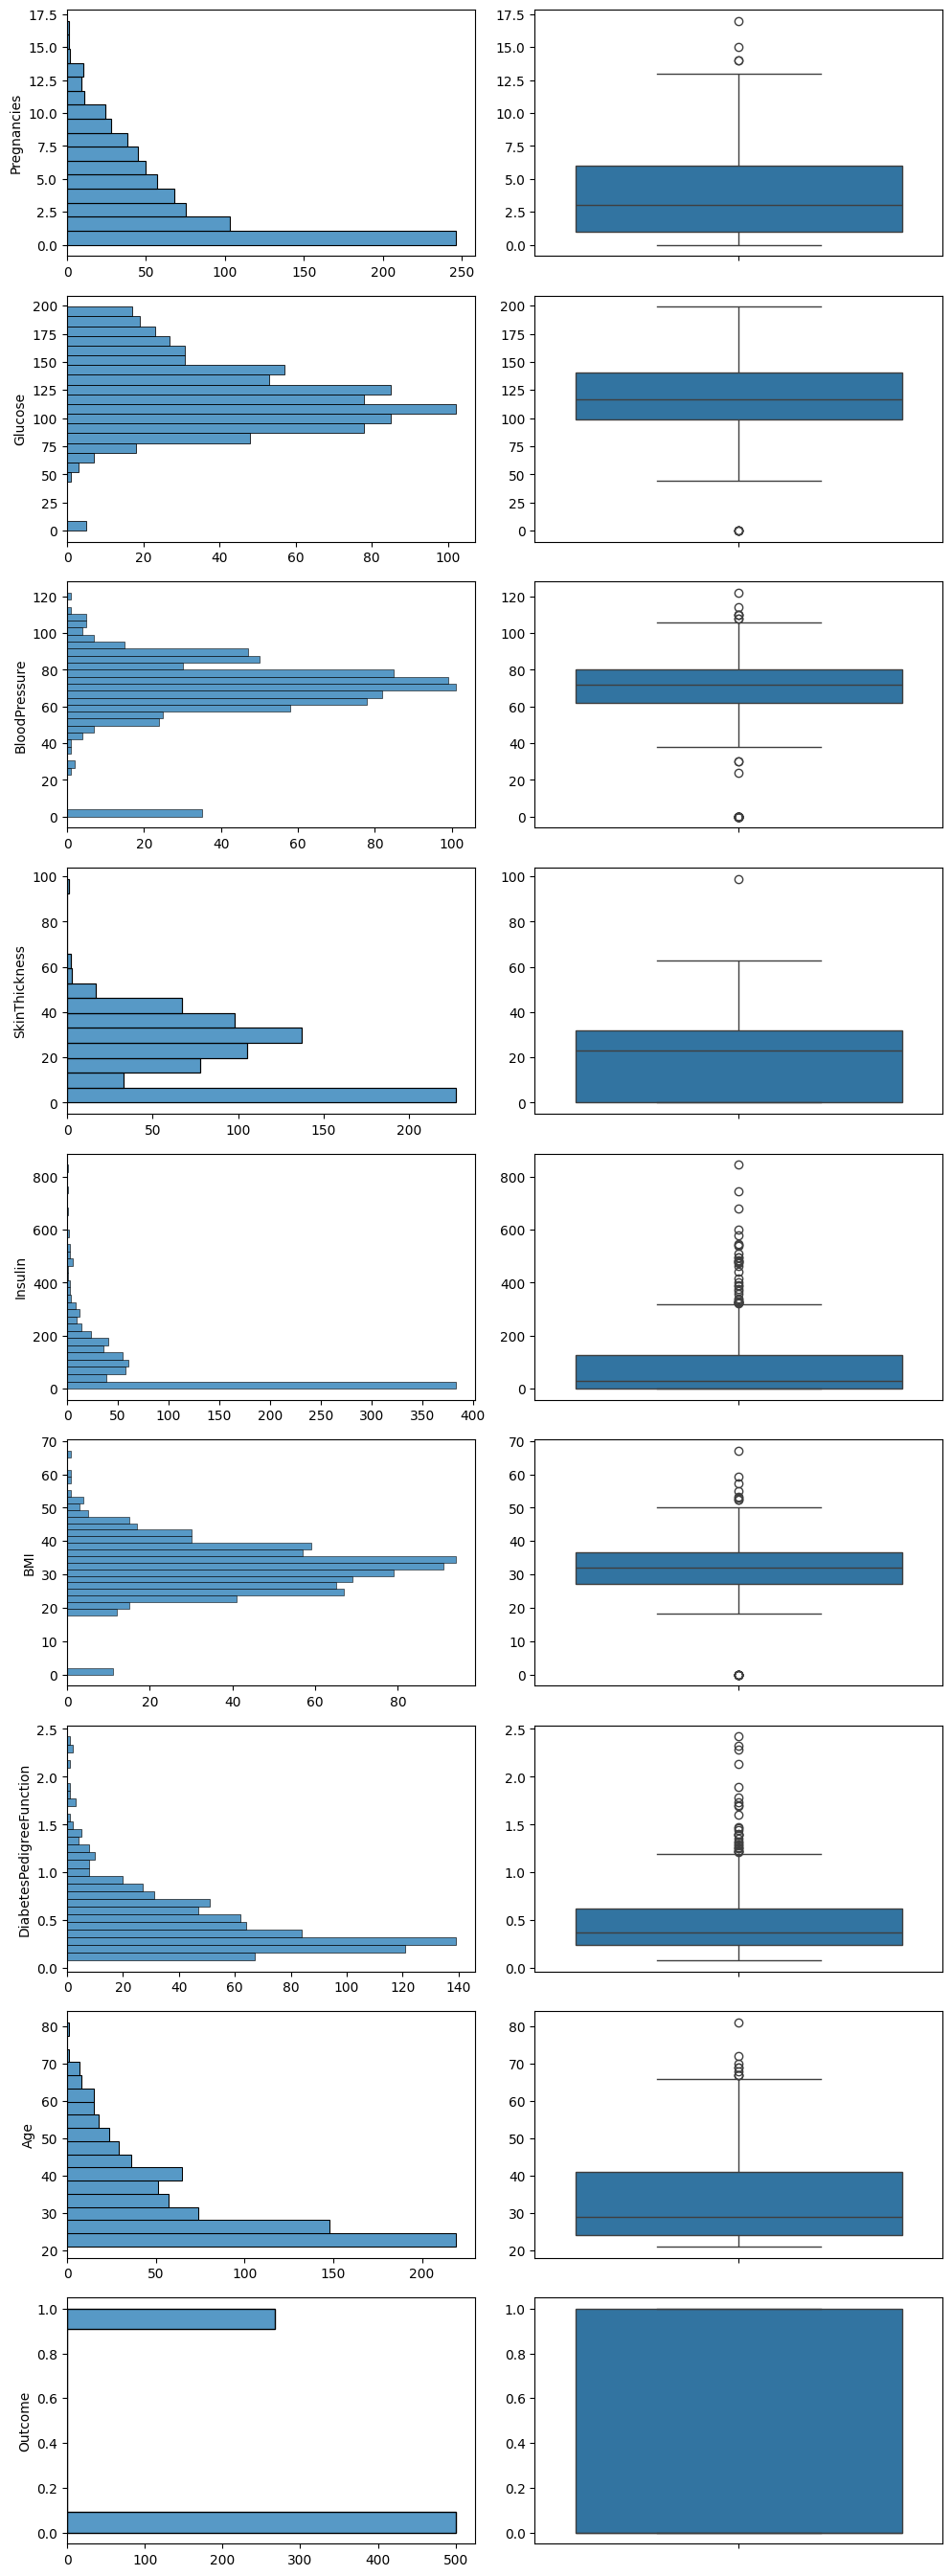

In [68]:
num_variables = df.select_dtypes(include=['int64','float64']).columns.tolist()


fig, axis = plt.subplots(len(num_variables), 2, figsize=(10, 3*len(num_variables)))

for i, var in enumerate(num_variables):
    sns.histplot(ax=axis[i, 0], data=df, y=var).set(xlabel=None)
    sns.boxplot(ax=axis[i, 1], data=df, y=var).set(ylabel=None)


plt.tight_layout()
plt.show()

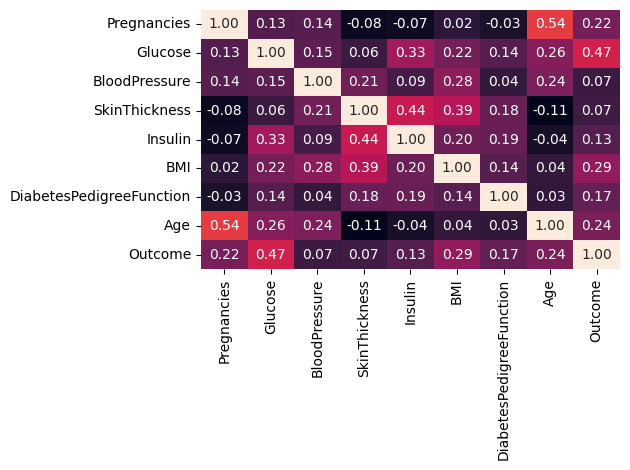

In [69]:
corr_y = df[num_variables].corr(numeric_only=True)

sns.heatmap(data=corr_y, annot=True, fmt=".2f", cbar=False)

plt.tight_layout()
plt.show()

In [70]:
num_variables.remove("Outcome")

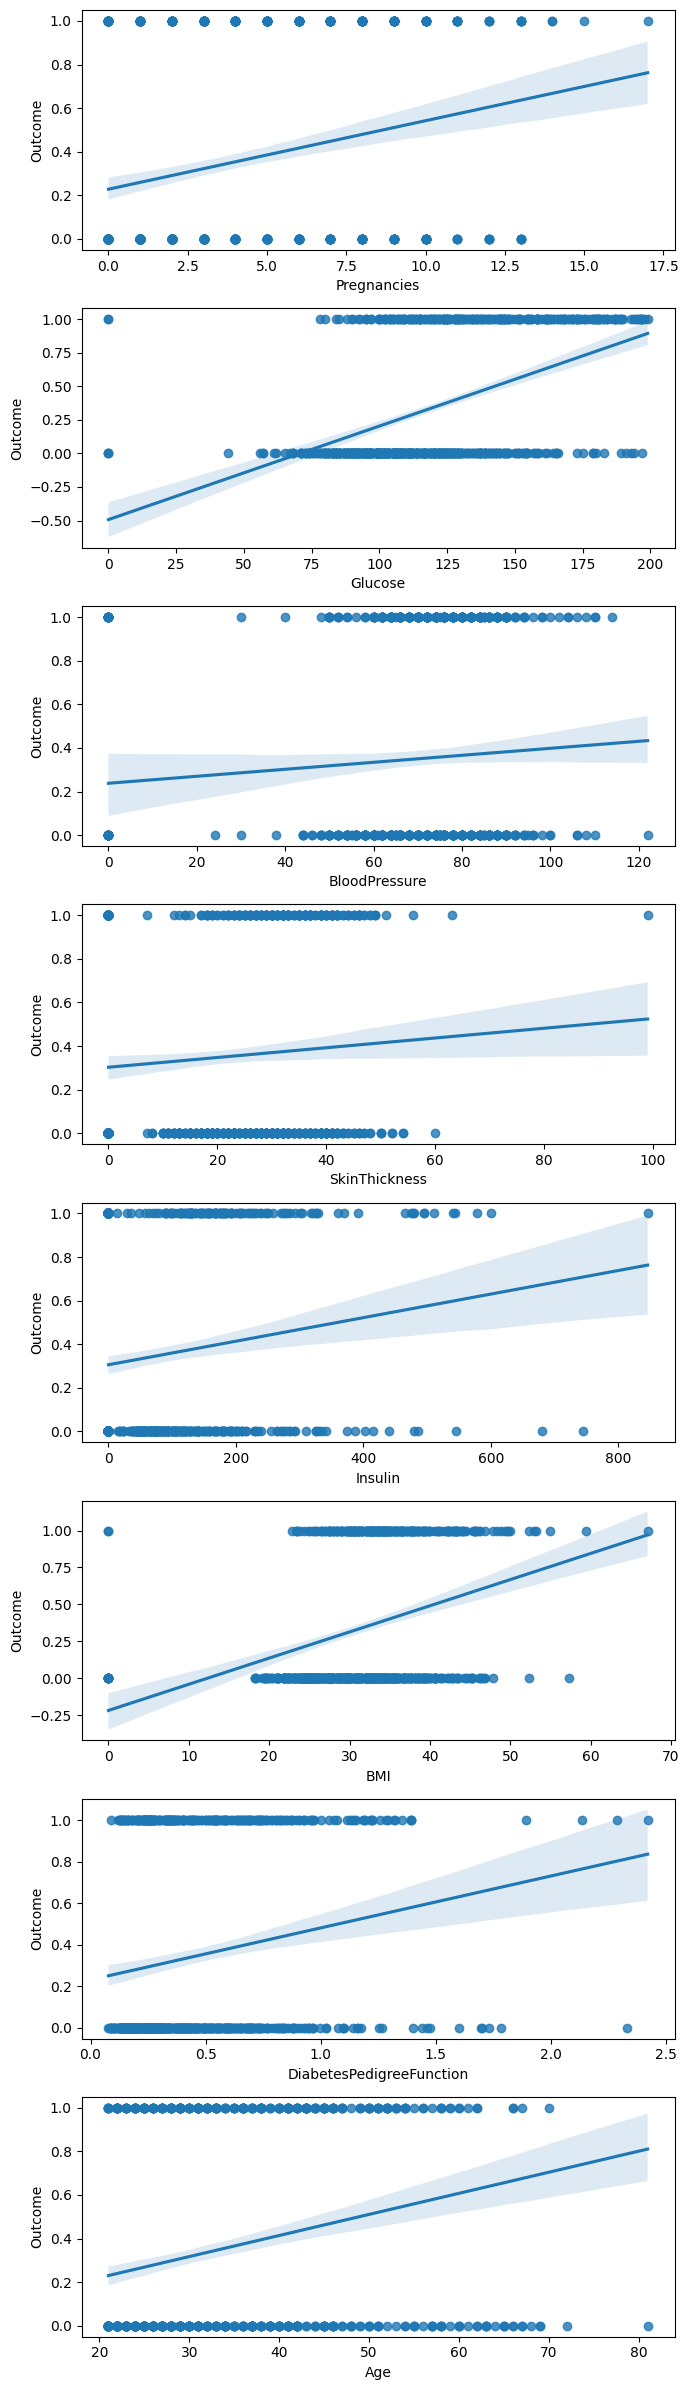

In [73]:
fig, axis = plt.subplots(len(num_variables), 1, figsize=(7, 3*len(num_variables)))

for i, var in enumerate(num_variables):
    sns.regplot(ax = axis[i], data = df, x = var, y = "Outcome")

plt.tight_layout()

plt.show()

## Paso 6: Ingeniería de características

### Análisis de outliers

### Análisis de valores faltantes

### Inferencia de nuevas características

## Paso 7: Split 

## Paso 8: Encoding & Scaling 

### Normalización o Escalado Mínimo-Máximo

### Encoding - Codificación de variables categóricas

### Guardando los scalers & encoders